In [19]:
import pandas as pd
import numpy as np
#graphe , correlation
import matplotlib.pyplot as plt
import seaborn as sns
## KNNImputer pour la correlation , remplace les valeurs nulles
from sklearn.impute import KNNImputer

# User Story 1 : Chargement et Analyse exploratoire des données (EDA)

<span style="color:#007ACC; font-weight:bold">
Importer les données à l’aide de pandas.  
Comprendre la structure générale du jeu de données (types, dimensions, aperçus).
</span>



In [5]:

df = pd.read_csv("dataset-diabete.csv")   
df.head()   


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148,72,35,0,33.6,0.627,50
1,1,1,85,66,29,0,26.6,0.351,31
2,2,8,183,64,0,0,23.3,0.672,32
3,3,1,89,66,23,94,28.1,0.167,21
4,4,0,137,40,35,168,43.1,2.288,33


In [3]:
df.describe()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<span style="color:#007ACC; font-weight:bold">Identifier les valeurs manquantes et les doublons.</span>  

Après la description des données, on remarque qu’il y a des valeurs égales à 0 pour certaines features qui, logiquement, ne peuvent pas avoir de valeur 0.  
Nous allons donc considérer ces valeurs comme des valeurs nulles et manquantes.
<ul>
<li>1 _ on remplace les 0 par NA</li>
<li>2 _ on supprime les doublons</li>
<li>3 _ on compte les valeurs manquantes</li>
</ul>


In [ ]:
# Colonnes où 0 n'est pas valide
cols_to_fix = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
# Remplacer les 0 par NaN
df[cols_to_fix] = df[cols_to_fix].replace(0, pd.NA)


# supprimer les doublons
    # Afficher le nombre de doublons avant suppression
print("Nombre de doublons avant :", df.duplicated().sum())
    # Supprimer les doublons
df = df.drop_duplicates()
    # Vérifier après suppression
print("Nombre de doublons après :", df.duplicated().sum())


# compter les valeurs manquantes
print("Somme des valeurs null : \n" ,df.isnull().sum())

Nombre de doublons avant : 0
Nombre de doublons après : 0
Somme des valeurs null : 
 Unnamed: 0                    0
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


Analyser la distribution des variables numériques.


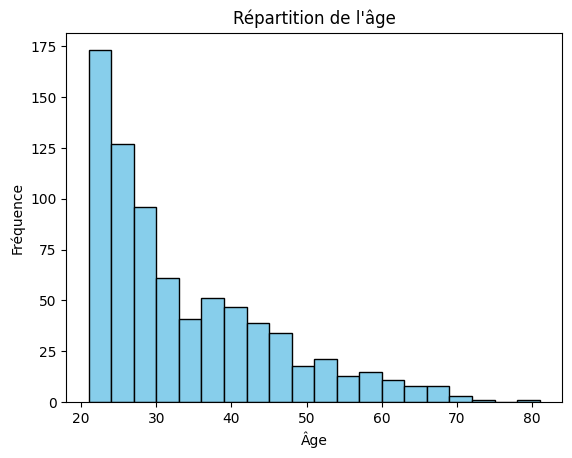

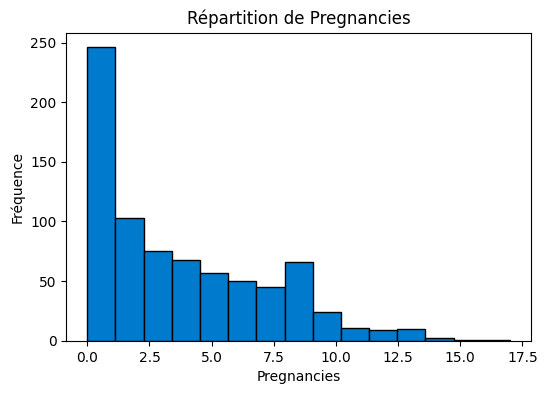

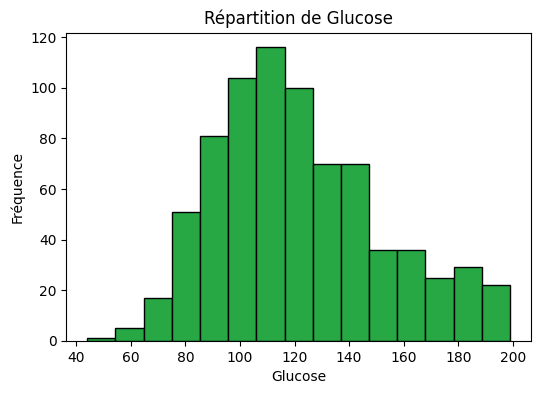

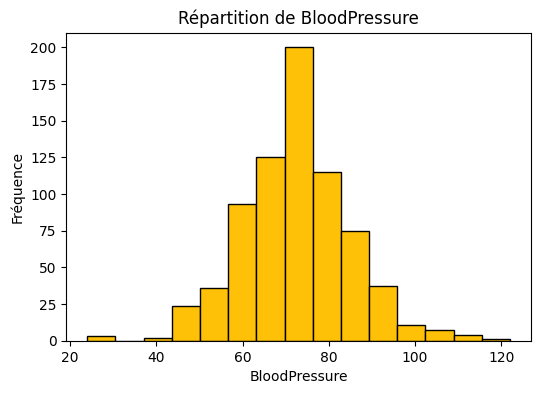

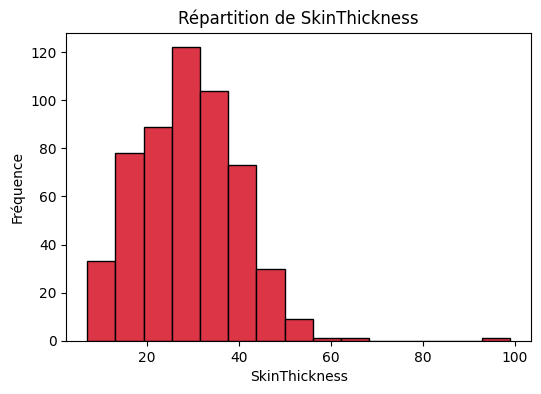

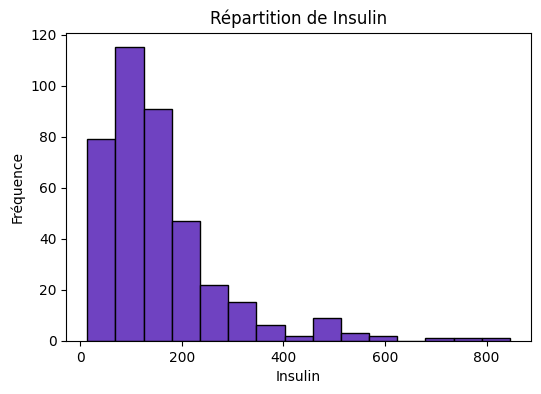

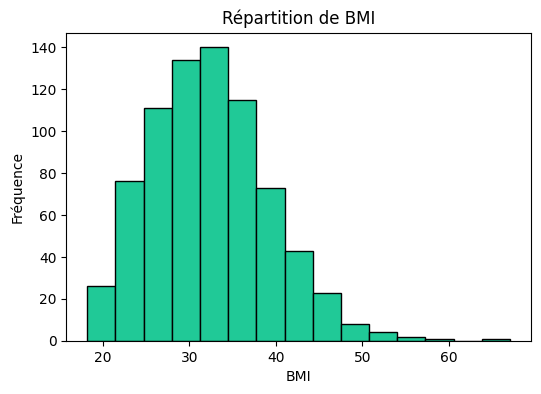

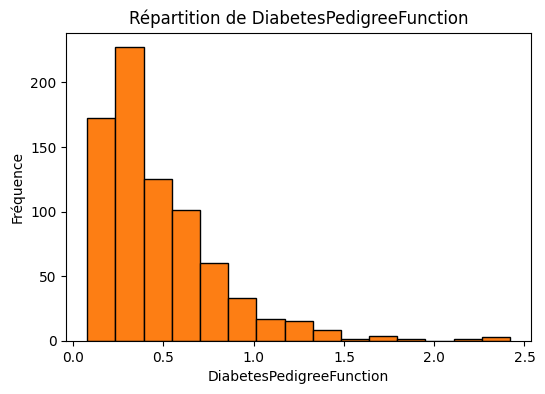

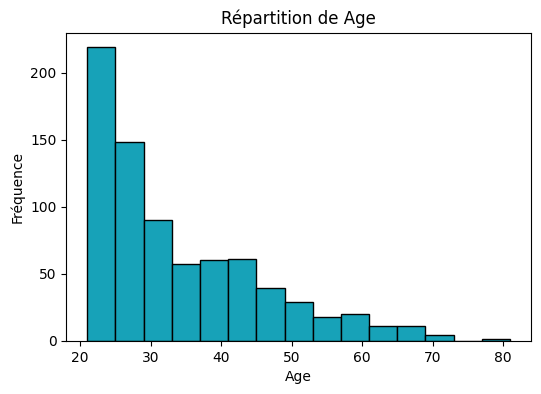

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.hist(df["Age"], bins=20, color="skyblue", edgecolor="black")
# plt.title("Répartition de l'âge")
# plt.xlabel("Âge")
# plt.ylabel("Fréquence")
# plt.show()


numeric_cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
colors = ["#007ACC", "#28A745", "#FFC107", "#DC3545", "#6F42C1", "#20C997", "#FD7E14", "#17A2B8"]

for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=15, color=colors[i], edgecolor="black")
    plt.title(f"Répartition de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()



<span style="color:#007ACC; font-weight:bold"> Étudier les relations entre variables à l’aide de matrices de  corrélation et de visualisations.</span>

<span style="color:red; font-weight:bold"> on repondant au question 1 de user story 2</span>
<span style="color:#007ACC; font-weight:bold"> Identifier et traiter les valeurs manquantes dans le jeu de données si elles existent. </span>

Pour réaliser la matrice de corrélation, il est nécessaire de **remplir les valeurs manquantes** au préalable.  

Il existe plusieurs méthodes pour cela, comme l’imputation par la **moyenne** ou la **médiane**.  
Cette fois-ci, nous allons utiliser **KNNImputer (K-Nearest Neighbors)**.  

Cette méthode remplace chaque valeur manquante par une estimation basée sur les **valeurs des k voisins les plus proches**, c’est-à-dire des observations ayant des valeurs similaires ou proches dans les autres colonnes.  
Ainsi, on obtient des valeurs plus proches de la réalité que celles obtenues par moyenne ou médiane simples.  

**Contraintes et limites de KNNImputer :**  
- **Calcul intensif** : Trouver les k voisins les plus proches pour chaque valeur manquante peut être coûteux, surtout pour de grands ensembles de données.  
- **Sensible aux valeurs aberrantes** : Les outliers peuvent influencer l’imputation en biaisant la moyenne des voisins.  
- **Nécessite suffisamment de données** : Fonctionne mieux lorsqu’il y a assez d’observations pour trouver des voisins fiables. Si la proportion de valeurs manquantes est trop élevée, la méthode peut être moins efficace.


In [18]:
import pandas as pd
from sklearn.impute import KNNImputer

numeric_cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# S'assurer que les colonnes sont numériques
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Créer l'imputer KNN
imputer = KNNImputer(n_neighbors=5)  # n_neighbors=5 par défaut

# Appliquer l'imputer
df[numeric_cols] = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Vérifier qu'il n'y a plus de valeurs manquantes
print(df[numeric_cols].isnull().sum())



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


on a traité les données on passe au correlation 

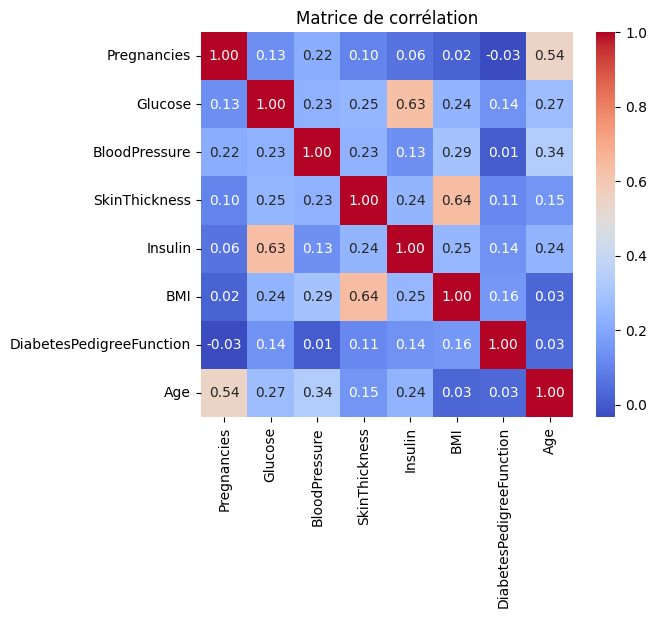

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

corr = df[numeric_cols].corr()


# affiche sous format matrice
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()



<span style="color:red">Analyse :</span>

** Corrélations fortes**

- **Insulin & Glucose → 0.63**  
  Les niveaux d’insuline augmentent généralement avec la glycémie. Corrélation logique biologiquement.

- **BMI & SkinThickness → 0.64**  
  Plus le BMI est élevé, plus l’épaisseur cutanée (SkinThickness) est grande, cohérent avec l’indice de masse corporelle.

- **Age & Pregnancies → 0.54**  
  Plus l’âge augmente, plus le nombre de grossesses a tendance à être élevé.


## User Story 2 : Prétraitement des données - Gestion des valeurs manquantes et aberrantes

<span style="color:#007ACC; font-weight:bold"> Identifier et traiter les valeurs manquantes dans le jeu de données si elles existent. </span>  
la reponse en haut dans la reponse de la question de correlation d user story 1

<span style="color:#007ACC; font-weight:bold">Utiliser des techniques statistiques (ex. : boîte à moustaches, z-score, IQR) pour détecter les outliers. </span>  

Unnamed: 0 : 0 outliers détectés
Pregnancies : 0 outliers détectés
Glucose : 6 outliers détectés
BloodPressure : 0 outliers détectés
SkinThickness : 0 outliers détectés
Insulin : 0 outliers détectés
BMI : 0 outliers détectés
DiabetesPedigreeFunction : 0 outliers détectés
Age : 0 outliers détectés


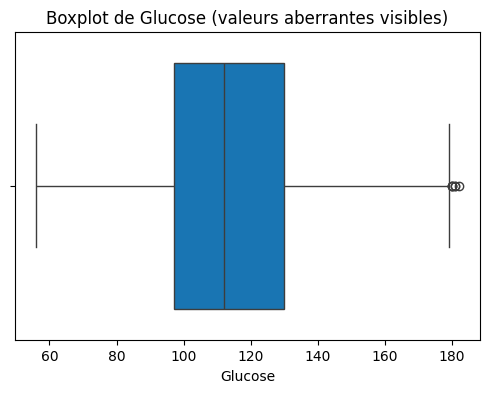

In [ ]:

# Sélectionner les colonnes numériques
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Fonction pour détecter les outliers selon l'IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Détecter les outliers pour chaque colonne numérique
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col} : {len(outliers)} outliers détectés")

# Affichage des boxplots pour chaque colonne
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    if len(outliers)!= 0 :  # j affiche boite a moutache seulement pour les features avec valeur aberrante
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df[col], color="#007ACC")
        plt.title(f"Boxplot de {col} (valeurs aberrantes visibles)")
        plt.show()


<span style="color:red">Analyse :</span>

Il n’y a que la variable Glucose qui présente des valeurs aberrantes.
Je l’affiche afin d’analyser la cause de cette anomalie, et déterminer si elle provient d’une erreur de saisie ou s’il s’agit d’une valeur réellement extrême mais valide.

In [34]:
from scipy import stats
import numpy as np
import pandas as pd

# Sélectionner les colonnes numériques
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calcul du Z-score pour chaque valeur
z_scores = np.abs(stats.zscore(df[numeric_cols]))

# Convertir en DataFrame pour retrouver les noms de colonnes
z_scores_df = pd.DataFrame(z_scores, columns=numeric_cols)

# Détection des valeurs aberrantes (|z| > 3)
outliers_z = (z_scores_df > 3)

# Affichage du nombre d'outliers par colonne
for col in numeric_cols:
    print(f"{col} : {outliers_z[col].sum()} outliers détectés (méthode Z-score)")


Unnamed: 0 : 0 outliers détectés (méthode Z-score)
Pregnancies : 0 outliers détectés (méthode Z-score)
Glucose : 0 outliers détectés (méthode Z-score)
BloodPressure : 0 outliers détectés (méthode Z-score)
SkinThickness : 0 outliers détectés (méthode Z-score)
Insulin : 0 outliers détectés (méthode Z-score)
BMI : 0 outliers détectés (méthode Z-score)
DiabetesPedigreeFunction : 0 outliers détectés (méthode Z-score)
Age : 0 outliers détectés (méthode Z-score)
